In our temperature prediction example, let’s change our model to a non-linear system. Consider the following description for our model:

**w2 * t_u ** 2 + w1 * t_u + b.**

2.a Modify the training loop properly to accommodate this redefinition. 

2.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss for every 500 epochs per training.

2.c Pick the best non-linear model and compare your final best loss against the linear model that we did during the lecture. For this, visualize the non-linear model against the linear model over the input dataset, as we did during the lecture. Is the actual result better or worse than our baseline linear model?

 

In [338]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)

In [339]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()    

In [340]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

def training_loop(n_epochs, learning_rate, params, t_u, t_c,
                  print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b) 

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}: 
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break 
            
    return params

In [341]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = 0.1 * t_u

In [342]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000,
        21.8000, 48.4000, 60.4000, 68.4000])

In [343]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [344]:
x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2, 1, 1)
print(f"shapes: x: {x.shape}")
print(f"        y: {y.shape}")
print(f"        z: {a.shape}")
print(f"        a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

shapes: x: torch.Size([])
        y: torch.Size([3, 1])
        z: torch.Size([2, 1, 1])
        a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


In [345]:
delta = 0.1

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) - 
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

In [346]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 1763.884766
    Params: tensor([-44.1730,  -0.8260])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 5802484.500000
    Params: tensor([2568.4011,   45.1637])
    Grad:   tensor([-261257.4062,   -4598.9702])
Epoch 3, Loss 19408029696.000000
    Params: tensor([-148527.7344,   -2616.3931])
    Grad:   tensor([15109614.0000,   266155.6875])
...
Epoch 10, Loss 90901105189019073810297959556841472.000000
    Params: tensor([3.2144e+17, 5.6621e+15])
    Grad:   tensor([-3.2700e+19, -5.7600e+17])
Epoch 11, Loss inf
    Params: tensor([-1.8590e+19, -3.2746e+17])
    Grad:   tensor([1.8912e+21, 3.3313e+19])


tensor([-1.8590e+19, -3.2746e+17])

In [347]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 1763.884766
    Params: tensor([ 0.5483, -0.0083])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 323.090515
    Params: tensor([ 0.3623, -0.0118])
    Grad:   tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
    Params: tensor([ 0.2858, -0.0135])
    Grad:   tensor([765.4666,  16.5122])
...
Epoch 10, Loss 29.105247
    Params: tensor([ 0.2324, -0.0166])
    Grad:   tensor([1.4803, 3.0544])
Epoch 11, Loss 29.104168
    Params: tensor([ 0.2323, -0.0169])
    Grad:   tensor([0.5781, 3.0384])
...
Epoch 99, Loss 29.023582
    Params: tensor([ 0.2327, -0.0435])
    Grad:   tensor([-0.0533,  3.0226])
Epoch 100, Loss 29.022667
    Params: tensor([ 0.2327, -0.0438])
    Grad:   tensor([-0.0532,  3.0226])


tensor([ 0.2327, -0.0438])

In [348]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c,
    print_params = True
    )

params

Epoch 1, Loss 80.364342
    Params: tensor([1.0078, 0.0011])
    Grad:   tensor([-77.6140, -10.6400])
Epoch 2, Loss 79.752480
    Params: tensor([1.0155, 0.0021])
    Grad:   tensor([-77.1465, -10.5575])
Epoch 3, Loss 79.148026
    Params: tensor([1.0231, 0.0032])
    Grad:   tensor([-76.6818, -10.4754])
...
Epoch 10, Loss 75.116219
    Params: tensor([1.0755, 0.0103])
    Grad:   tensor([-73.5070,  -9.9150])
Epoch 11, Loss 74.567734
    Params: tensor([1.0829, 0.0113])
    Grad:   tensor([-73.0644,  -9.8368])
...
Epoch 99, Loss 45.087246
    Params: tensor([1.5803, 0.0721])
    Grad:   tensor([-42.9955,  -4.5296])
Epoch 100, Loss 44.900906
    Params: tensor([1.5845, 0.0726])
    Grad:   tensor([-42.7380,  -4.4842])
...
Epoch 4000, Loss 26.422497
    Params: tensor([ 2.4745, -0.9270])
    Grad:   tensor([-0.4919,  2.7822])
Epoch 5000, Loss 25.637672
    Params: tensor([ 2.5233, -1.2029])
    Grad:   tensor([-0.4835,  2.7353])


tensor([ 2.5233, -1.2029])

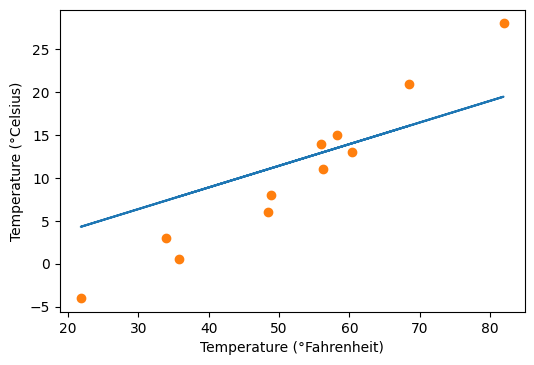

In [349]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params) 

fig = plt.figure(dpi=100)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) 
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
# plt.savefig("temp_unknown_plot.png", format="png") 

For none linear model

In [350]:
def model_nonlinear(t_u, w1, w2, b):
    return w2 * t_u **2 + w1 * t_u + b

def dmodel_dw1(t_u, w1, w2, b):
    return t_u

def dmodel_dw2(t_u, w1, w2, b):
    return t_u **2

def dmodel_db_nonlinear(t_u, w1, w2, b):
    return 1.0

def grad_fn_nonlinear(t_u, t_c, t_p, w1, w2, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, w2, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w1, w2, b)
    dloss_db_nonlinear = dloss_dtp * dmodel_db_nonlinear(t_u, w1, w2, b)
    return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db_nonlinear.sum()])

def training_loop_nonlinear(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
    for epoch in range(1, n_epochs + 1):
        w1, w2, b = params

        t_p = model_nonlinear(t_u, w1, w2, b)  
        loss = loss_fn(t_p, t_c)
        grad = grad_fn_nonlinear(t_u, t_c, t_p, w1, w2, b) 

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 500, 1000, 2000, 3000, 4000, 5000}: 
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        
        if epoch % 500 == 0:
          print("Epoch %d, Loss %f" %(epoch, float(loss)))

        if not torch.isfinite(loss).all():
            break 
            
    return params

In [351]:
# t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
# t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
# t_c = torch.tensor(t_c)
# t_u = torch.tensor(t_u)
# t_un = 0.1 * t_u

w1 = torch.ones(())
w2 = torch.ones(())
# b = torch.zeros(())

t_p = model_nonlinear(t_u, w1, w2, b)
t_p

tensor([1356.1901, 3226.7100, 3491.4399, 6835.5103, 3271.9900, 2486.1101,
        1229.1101,  543.0399, 2436.9600, 3754.5601, 4792.9600])

In [352]:
params = training_loop_nonlinear(
    n_epochs = 5000, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_un,
    t_c = t_c,
    print_params = True
    )

params

Epoch 1, Loss 675.794373
    Params: tensor([ 0.9720,  0.8260, -0.0048])
    Grad:   tensor([ 279.6790, 1739.5315,   48.1760])
Epoch 2, Loss 401.575317
    Params: tensor([ 0.9504,  0.6929, -0.0086])
    Grad:   tensor([ 215.8319, 1331.2151,   37.6454])
Epoch 3, Loss 240.907486
    Params: tensor([ 0.9338,  0.5911, -0.0115])
    Grad:   tensor([ 166.9600, 1018.6732,   29.5846])
Epoch 10, Loss 18.931562
    Params: tensor([ 0.8845,  0.3103, -0.0211])
    Grad:   tensor([ 32.0173, 155.7676,   7.3249])
Epoch 11, Loss 16.693750
    Params: tensor([ 0.8819,  0.2984, -0.0217])
    Grad:   tensor([ 26.2559, 118.9378,   6.3741])
Epoch 99, Loss 12.956314
    Params: tensor([ 0.8111,  0.2701, -0.0512])
    Grad:   tensor([ 7.2397, -1.2141,  3.1856])
Epoch 100, Loss 12.949914
    Params: tensor([ 0.8103,  0.2702, -0.0515])
    Grad:   tensor([ 7.2372, -1.2137,  3.1847])
Epoch 500, Loss 10.708597
    Params: tensor([ 0.5400,  0.3155, -0.1712])
    Grad:   tensor([ 6.3023, -1.0579,  2.8121])
Epoch 

tensor([-0.8881,  0.5570, -0.8753])

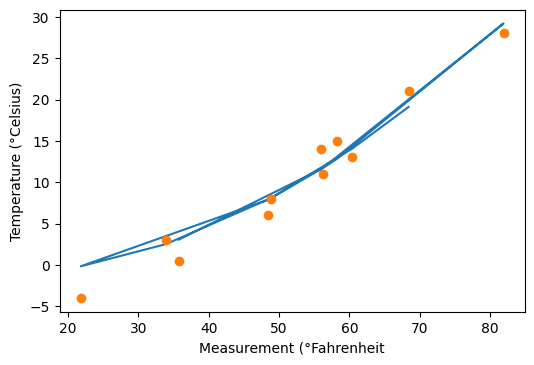

In [353]:
t_p = model_nonlinear(t_un, *params) 

fig = plt.figure(dpi=100)
plt.xlabel("Measurement (°Fahrenheit")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
# plt.savefig("temp_data_plot.png", format="png")